## Import important libraries 

In [40]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [41]:
olix_data = pd.read_excel(r"C:/Users/NEXT/Desktop/Arabian Academy/My projects/Dubizzle houses pridiction/dubizzle_data__.xlsx")
olix_data.head()

,الرابط,العنوان,السعر,الموقع,النوع,ملكية,المساحة (م٢),غرف نوم,الحمامات,مفروش,اسم_البائع_أو_الوكالة,عضو_منذ,صورة_اللوجو
0,https://www.dubizzle.com.eg/ad/%D8%A7%D8%B3%D8...,استلام فوري شقة ريسيل 3 غرف نوم وغرفة ناني برا...,"8,500,000 ج.م",NaN,شقة,إعادة بيع,173,3,3,لا,عضو منذ ديسمبر 2024,عضو منذ ديسمبر 2024,https://images.dubizzle.com.eg/thumbnails/1445...
1,https://www.dubizzle.com.eg/ad/%D9%87%D8%A7%D9...,هايد بارك متشطبة مطبخ بالاجهزة + تكييفات اقل سعر,"14,900,000 ج.م",NaN,شقة,إعادة بيع,209,3,3,لا,عضو منذ يونيو 2025,عضو منذ يونيو 2025,https://images.dubizzle.com.eg/thumbnails/1477...
2,https://www.dubizzle.com.eg/ad/%D8%B4%D9%82%D8...,شقة 207م فاخرة في هايد بارك – أفضل ڤيو بالمرحل...,"11,500,000 ج.م",NaN,شقة,إعادة بيع,207,3,4,لا,عضو منذ يناير 2025,عضو منذ يناير 2025,https://images.dubizzle.com.eg/thumbnails/1479...
3,https://www.dubizzle.com.eg/ad/%D8%A7%D9%85%D9...,امواج الساحل الشمالي دوبلكس للبيع تحت سعر السو...,"12,700,000 ج.م",NaN,دوبلكس,إعادة بيع,175,3,3,نعم,عضو منذ مارس 2025,عضو منذ مارس 2025,https://images.dubizzle.com.eg/thumbnails/1400...
4,https://www.dubizzle.com.eg/ad/%D8%B4%D9%82%D9...,شقه ١٣٠ متر للبيع في عين شمس الغربيه تشطيب سوب...,"900,000 ج.م",NaN,شقة,إعادة بيع,130,2,1,غير محدد,عضو منذ ديسمبر 2019,عضو منذ ديسمبر 2019,https://images.dubizzle.com.eg/thumbnails/1482...


In [42]:
print(olix_data.columns.tolist())

['الرابط', 'العنوان', 'السعر', 'الموقع', 'النوع', 'ملكية', 'المساحة (م٢)', 'غرف نوم', 'الحمامات', 'مفروش', 'اسم_البائع_أو_الوكالة', 'عضو_منذ', 'صورة_اللوجو']


In [43]:
'''
أهم العناصر الاساسسية : 
1 | عدد الغرف 
2 | عدد الحمامات 
3 | النوع 
4 | مفروشة ولا لا 
5 | المساحة 
6 | العنوان 
________
'''

'\nأهم العناصر الاساسسية : \n1 | عدد الغرف \n2 | عدد الحمامات \n3 | النوع \n4 | مفروشة ولا لا \n5 | المساحة \n6 | العنوان \n________\n'

## Preprocissing

In [44]:
import numpy as np

# نشتغل على نسخة
olix_data_copy = olix_data.copy()

# السعر
olix_data_copy["price"] = (
    olix_data_copy["السعر"]
    .astype(str)
    .str.replace(r"[^\d]", "", regex=True)
    .replace("", np.nan)
    .astype(float)
)

# الحمامات
olix_data_copy["bathrooms"] = (
    olix_data_copy["الحمامات"]
    .astype(str)
    .str.replace(r"[^\d]", "", regex=True)
    .replace("", np.nan)
    .astype(float)
)

# مفروش
olix_data_copy["furnished"] = olix_data_copy["مفروش"].map({
    "نعم": 1,
    "لا": 0,
    "غير محدد": np.nan
})

# المساحة
olix_data_copy["area"] = (
    olix_data_copy["المساحة (م٢)"]
    .astype(str)
    .str.replace(r"[^\d]", "", regex=True)
    .replace("", np.nan)
    .astype(float)
)

# غرف النوم
olix_data_copy["bedrooms"] = (
    olix_data_copy["غرف نوم"]
    .astype(str)
    .str.replace(r"[^\d]", "", regex=True)
    .replace("", np.nan)
    .astype(float)
)

# النوع
olix_data_copy["type"] = (
    olix_data_copy["النوع"]
    .map({"شقة": 4, "دوبلكس": 1, "فيلا": 2, "بنتهاوس": 3})
    .fillna(0)        # أو اختار قيمة افتراضية
    .astype(int)
)

olix_data_copy["ownership"] = (
    olix_data_copy["ملكية"]
    .map({"إعادة بيع": 0, "جديد": 1})
    .fillna(0)
    .astype(int)
)


print(
    olix_data_copy[
        ["price","area","bedrooms","bathrooms","furnished","ownership","type"]
    ].head()
)


        price   area  bedrooms  bathrooms  furnished  ownership  type
0   8500000.0  173.0       3.0        3.0        0.0          0     4
1  14900000.0  209.0       3.0        3.0        0.0          0     4
2  11500000.0  207.0       3.0        4.0        0.0          0     4
3  12700000.0  175.0       3.0        3.0        1.0          0     1
4    900000.0  130.0       2.0        1.0        NaN          0     4


## ٍSpliting Data

In [45]:
X = olix_data_copy[["area", "bedrooms", "bathrooms", "furnished", "type", "ownership"]]
y = olix_data_copy["price"]

In [46]:
X = X.dropna()
y = y.loc[X.index]


In [47]:
from sklearn.preprocessing import LabelEncoder

# --- تحويل النصوص لأرقام ---
label_encoders = {}
for col in ["type", "ownership"]:
    le = LabelEncoder()
    olix_data_copy[col] = le.fit_transform(olix_data_copy[col].astype(str))
    label_encoders[col] = le

print(olix_data_copy[["type","ownership"]].head())


   type  ownership
0     3          0
1     3          0
2     3          0
3     1          0
4     3          0


In [48]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [49]:
print(olix_data_copy.dtypes)
print(olix_data_copy.head())


الرابط                    object
العنوان                   object
السعر                     object
الموقع                    object
النوع                     object
ملكية                     object
المساحة (م٢)              object
غرف نوم                   object
الحمامات                  object
مفروش                     object
اسم_البائع_أو_الوكالة     object
عضو_منذ                   object
صورة_اللوجو               object
price                    float64
bathrooms                float64
furnished                float64
area                     float64
bedrooms                 float64
type                       int64
ownership                  int64
dtype: object
                                              الرابط  \
0  https://www.dubizzle.com.eg/ad/%D8%A7%D8%B3%D8...   
1  https://www.dubizzle.com.eg/ad/%D9%87%D8%A7%D9...   
2  https://www.dubizzle.com.eg/ad/%D8%B4%D9%82%D8...   
3  https://www.dubizzle.com.eg/ad/%D8%A7%D9%85%D9...   
4  https://www.dubizzle.com.eg/ad/%D8%B4%D9%82

### Fitting data into models

In [ ]:
#linear regression
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
y_pred_lin = lin_reg.predict(x_test)

print("Linear Regression R²:", r2_score(y_test, y_pred_lin))
print("Linear Regression RMSE:", mean_squared_error(y_test, y_pred_lin, squared=False))

Linear Regression R²: 0.2968004236812759
Linear Regression RMSE: 3915172.79201741


C:\Users\NEXT\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


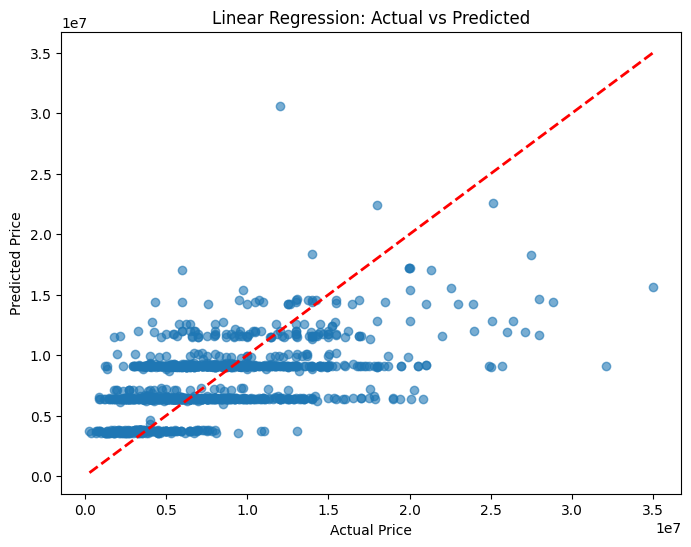

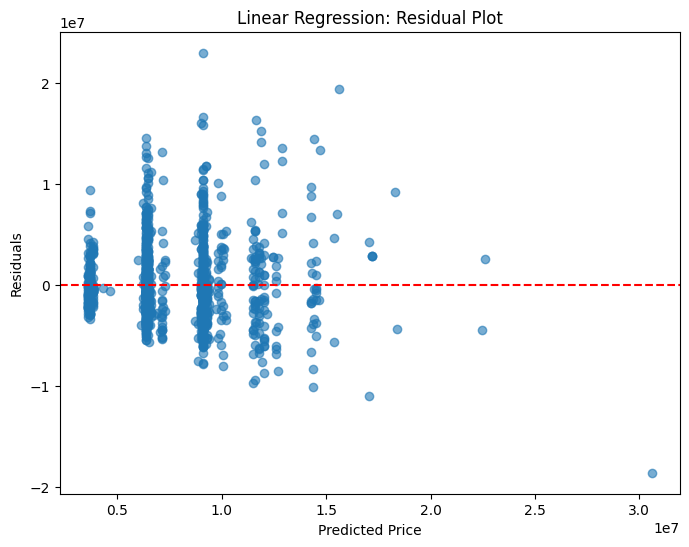

In [60]:
import matplotlib.pyplot as plt

# Scatter plot: الحقيقة vs التنبؤ
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_lin, alpha=0.6)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Linear Regression: Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         "r--", lw=2)  # خط مثالي لو التنبؤ = الحقيقة
plt.show()

# Residual plot
residuals = y_test - y_pred_lin

plt.figure(figsize=(8,6))
plt.scatter(y_pred_lin, residuals, alpha=0.6)
plt.axhline(y=0, color="r", linestyle="--")
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Linear Regression: Residual Plot")
plt.show()


In [63]:
#olynomial 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=2)  # جرّب 2 أو 3
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

poly_reg = LinearRegression()
poly_reg.fit(X_train, y_train)
y_pred_poly = poly_reg.predict(X_test)

print("Polynomial Regression R²:", r2_score(y_test, y_pred_poly))
print("Polynomial Regression RMSE:", mean_squared_error(y_test, y_pred_poly, squared=False))


Polynomial Regression R²: 0.28806846345888604
Polynomial Regression RMSE: 3939406.06707845


C:\Users\NEXT\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [56]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=200, random_state=42)
rf_reg.fit(x_train, y_train)
y_pred_rf = rf_reg.predict(x_test)

print("Random Forest R²:", r2_score(y_test, y_pred_rf))
print("Random Forest RMSE:", mean_squared_error(y_test, y_pred_rf, squared=False))


Random Forest R²: 0.2624701186921977
Random Forest RMSE: 4009603.6444014544


C:\Users\NEXT\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


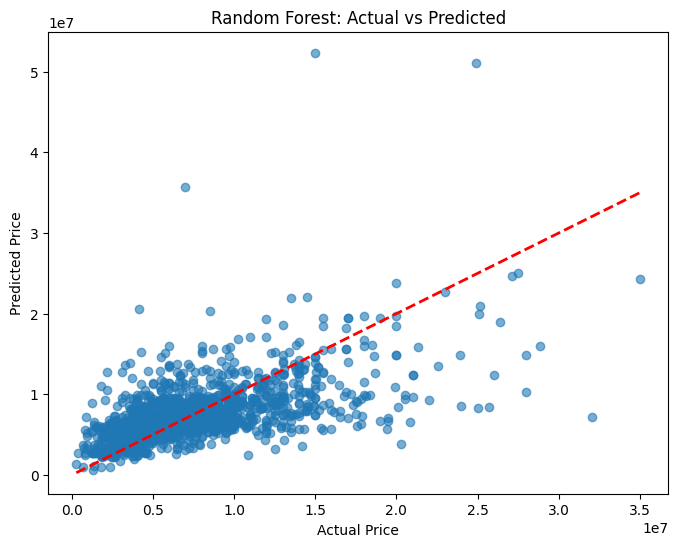

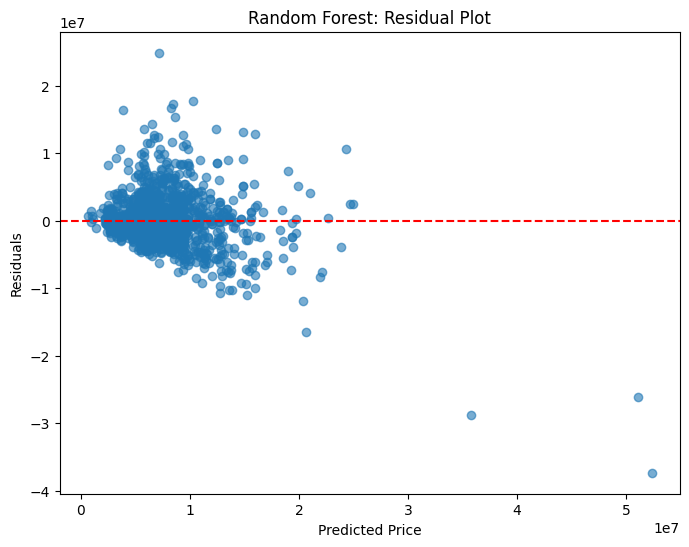

In [61]:
import matplotlib.pyplot as plt

# Scatter plot: الحقيقة vs التنبؤ
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_rf, alpha=0.6)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Random Forest: Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         "r--", lw=2)  # خط مثالي لو التنبؤ = الحقيقة
plt.show()

# Residual plot
residuals = y_test - y_pred_rf

plt.figure(figsize=(8,6))
plt.scatter(y_pred_rf, residuals, alpha=0.6)
plt.axhline(y=0, color="r", linestyle="--")
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Random Forest: Residual Plot")
plt.show()


In [59]:
# Xgboost
import xgboost as xgb

xgb_reg = xgb.XGBRegressor(n_estimators=300, learning_rate=0.1, random_state=42)
xgb_reg.fit(x_train, y_train)
y_pred_xgb = xgb_reg.predict(x_test)

print("XGBoost R²:", r2_score(y_test, y_pred_xgb))
print("XGBoost RMSE:", mean_squared_error(y_test, y_pred_xgb, squared=False))


XGBoost R²: 0.3011785181657568
XGBoost RMSE: 3902965.902135087


C:\Users\NEXT\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
